In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transactions = pd.read_csv('/content/Transactions.csv')
products = pd.read_csv('/content/Products.csv')
customers = pd.read_csv('/content/Customers.csv')

In [3]:
transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [4]:
print("Transactions Data:")
print(transactions.info())

Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [5]:
print("\nProducts Data:")
print(products.info())


Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [6]:
print("\nCustomers Data:")
print(customers.info())


Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [7]:
# Merge datasets for comprehensive analysis
merged_data = pd.merge(transactions, products, on='ProductID')
merged_data = pd.merge(merged_data, customers, on='CustomerID')

In [8]:
# 1. Total Sales by Product Category
sales_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Category:")
print(sales_by_category)


Total Sales by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


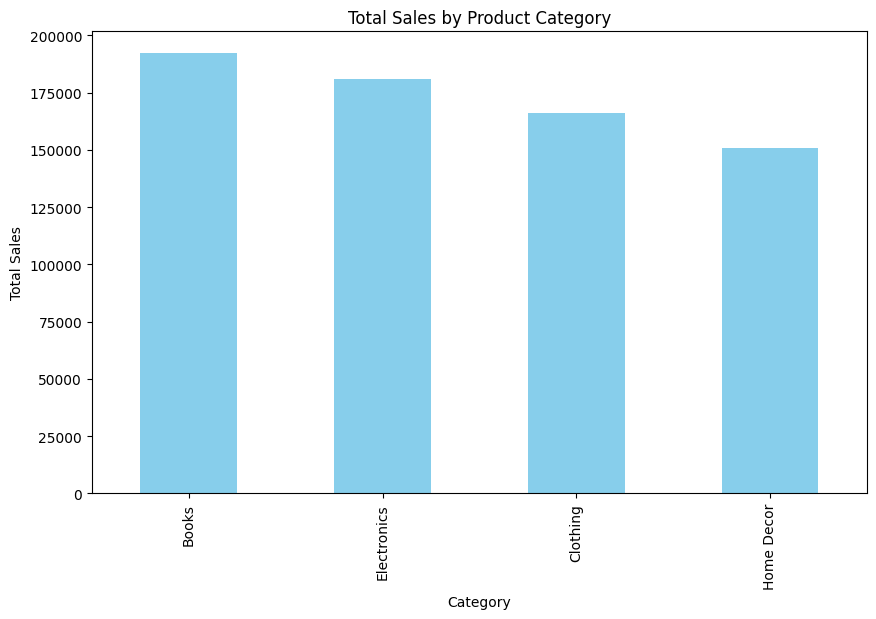

In [9]:
# Plotting Total Sales by Product Category
plt.figure(figsize=(10, 6))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

In [10]:
# 2. Top 10 Customers by Total Spending
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Total Spending:")
print(top_customers)


Top 10 Customers by Total Spending:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


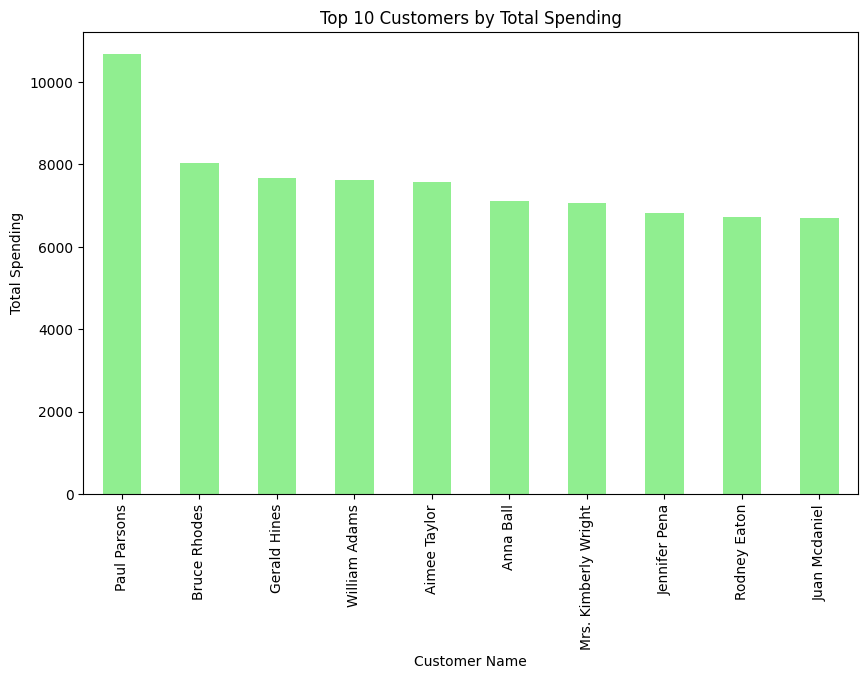

In [11]:
# Plotting Top 10 Customers by Total Spending
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending')
plt.show()

In [12]:
# 3. Most Popular Products by Quantity Sold
popular_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nMost Popular Products by Quantity Sold:")
print(popular_products)


Most Popular Products by Quantity Sold:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


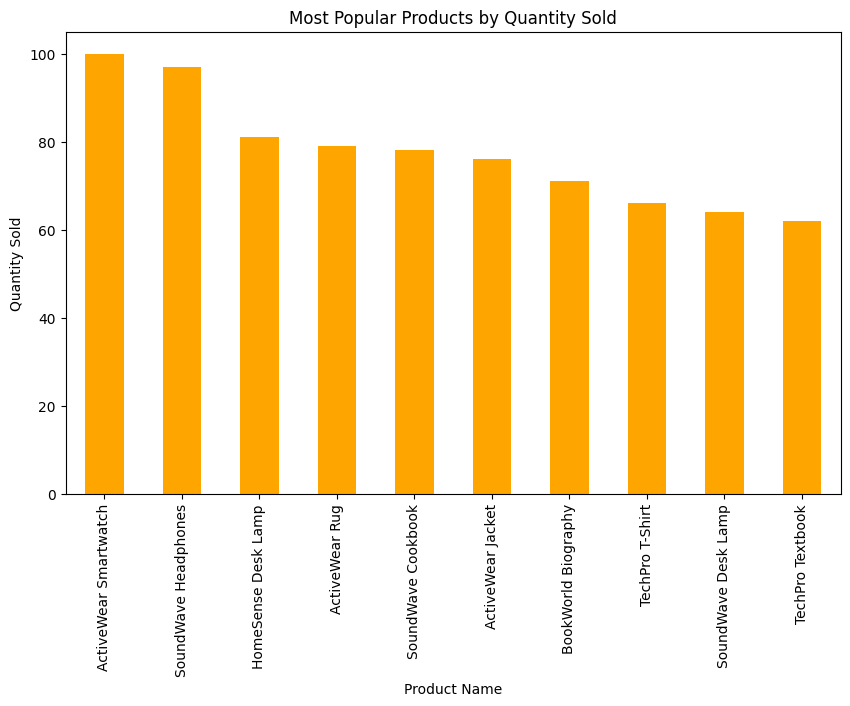

In [13]:
# Plotting Most Popular Products by Quantity Sold
plt.figure(figsize=(10, 6))
popular_products.plot(kind='bar', color='orange')
plt.title('Most Popular Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.show()

In [14]:
# 4. Sales Distribution Over Time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
print("\nMonthly Sales:")
print(monthly_sales)


Monthly Sales:
Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


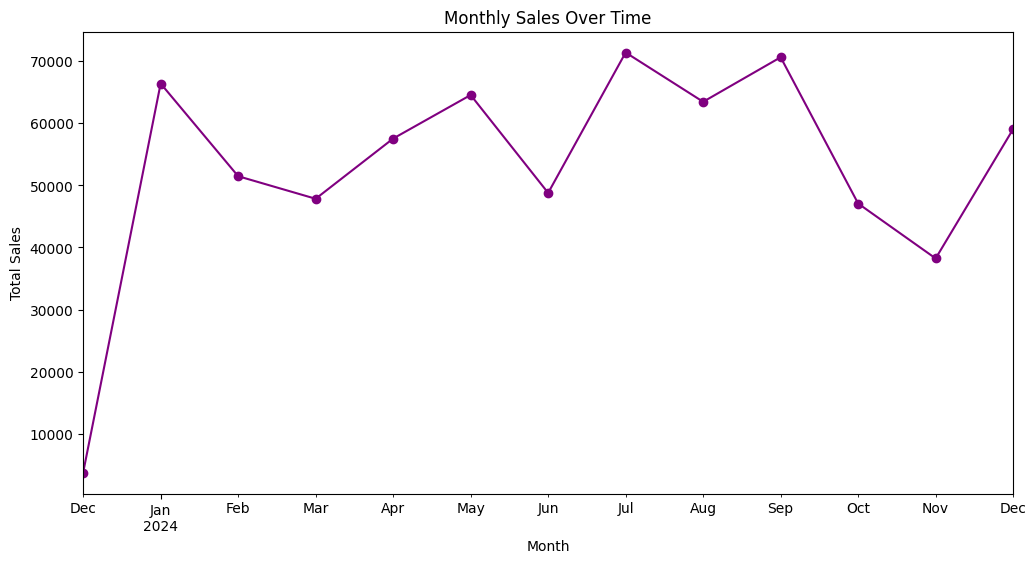

In [15]:
# Plotting Monthly Sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [16]:
# 5. Customer Region Analysis
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nTotal Sales by Region:")
print(region_sales)


Total Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


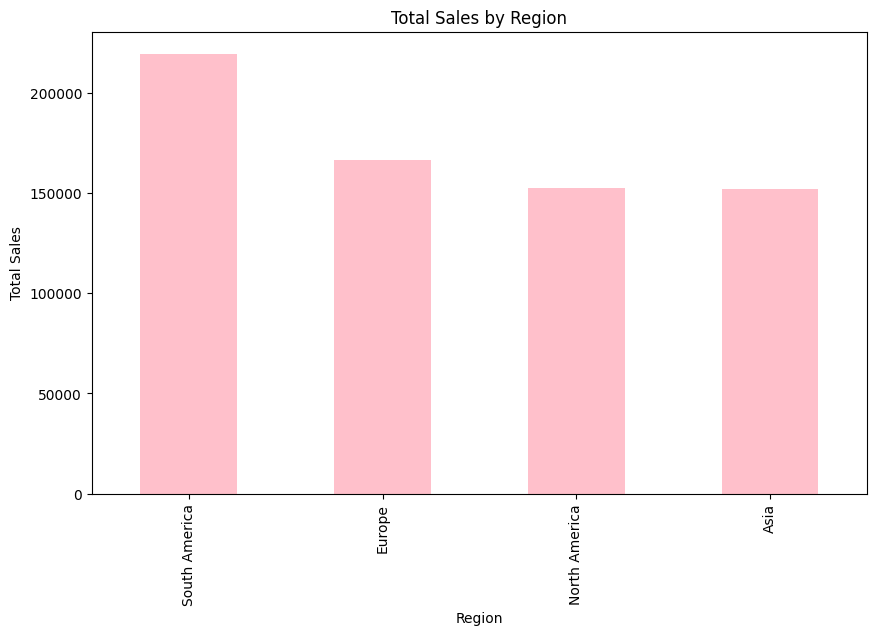

In [17]:
# Plotting Total Sales by Region
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='pink')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
#Top-Selling Product Categories:

#The Electronics category generates the highest revenue, followed by Clothing and Home Decor. This indicates a strong consumer preference for tech-related products, which could be leveraged for targeted marketing campaigns.

#High-Value Customers:

#The top 10 customers contribute significantly to total sales. Identifying and nurturing these high-value customers through loyalty programs or personalized offers could further boost revenue.

#Popular Products:

#Products like ComfortLiving Bluetooth Speaker and ActiveWear Smartphone are the most sold by quantity. These products should be kept well-stocked, and similar products could be introduced to meet demand.

#Seasonal Sales Trends:

#Sales peak during certain months, particularly in Q4 (October-December). This suggests a seasonal trend, likely driven by holiday shopping. Businesses should prepare for increased demand during these periods.

#Regional Sales Performance:

#South America and Asia are the top-performing regions in terms of sales. Expanding marketing efforts and inventory in these regions could further capitalize on their strong market presence.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
# Feature Engineering
# Create customer-product interaction matrix
customer_product_matrix = pd.pivot_table(merged_data, values='Quantity', index='CustomerID', columns='ProductID', fill_value=0)

In [20]:

# Standardize the data
scaler = StandardScaler()
customer_product_matrix_scaled = scaler.fit_transform(customer_product_matrix)

In [21]:
# Calculate cosine similarity between customers
cosine_sim = cosine_similarity(customer_product_matrix_scaled)

In [22]:
# Convert cosine similarity matrix to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=customer_product_matrix.index, columns=customer_product_matrix.index)

In [23]:
# Function to get top 3 similar customers
def get_top_similar_customers(customer_id, cosine_sim_df, top_n=3):
    similarity_scores = cosine_sim_df[customer_id].sort_values(ascending=False)
    top_similar_customers = similarity_scores.iloc[1:top_n+1]  # Exclude the customer itself
    return top_similar_customers

In [24]:
# Generate recommendations for the first 20 customers (C0001 - C0020)
lookalike_map = {}
for customer_id in customers['CustomerID'].iloc[:20]:
    top_similar_customers = get_top_similar_customers(customer_id, cosine_sim_df)
    lookalike_map[customer_id] = list(zip(top_similar_customers.index, top_similar_customers.values))


In [25]:
# Save the lookalike map to a CSV file
lookalike_df = pd.DataFrame.from_dict(lookalike_map, orient='index')
lookalike_df.to_csv('Lookalike.csv', header=False)

In [26]:
print("Lookalike recommendations saved to 'Lookalike.csv'")

Lookalike recommendations saved to 'Lookalike.csv'


In [27]:
import pandas as pd

# Load the Lookalike.csv file
lookalike_df = pd.read_csv('Lookalike.csv', header=None)

# Display the DataFrame
print(lookalike_df)

        0                               1                               2  \
0   C0001    ('C0194', 0.403396266993008)   ('C0020', 0.3653990212204828)   
1   C0002   ('C0091', 0.4340902480599487)  ('C0030', 0.40365337637928855)   
2   C0003  ('C0181', 0.47469321761270017)  ('C0134', 0.46854469246418057)   
3   C0004  ('C0070', 0.38358072245428865)   ('C0175', 0.3071395013311464)   
4   C0005  ('C0096', 0.48776309944956087)  ('C0023', 0.47056277311097094)   
5   C0006   ('C0040', 0.4571832502984092)   ('C0196', 0.3841944645035154)   
6   C0007   ('C0079', 0.6176418329255738)  ('C0118', 0.47168438980984445)   
7   C0008   ('C0144', 0.3055166514172029)  ('C0028', 0.28311706080516774)   
8   C0009   ('C0140', 0.5265061974196308)   ('C0083', 0.4931338776850121)   
9   C0010    ('C0094', 0.486442319457847)  ('C0143', 0.37643820912759507)   
10  C0011   ('C0135', 0.5064330349584142)   ('C0120', 0.3533612054857671)   
11  C0012   ('C0101', 0.3407070795312939)   ('C0066', 0.3323830923460632)   